In [1]:
import numpy as np
import pickle

%matplotlib inline
from matplotlib import pyplot as plt

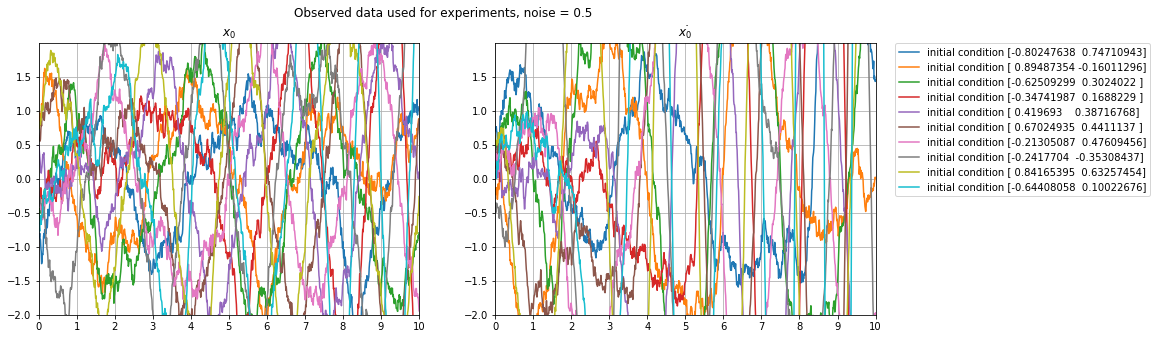

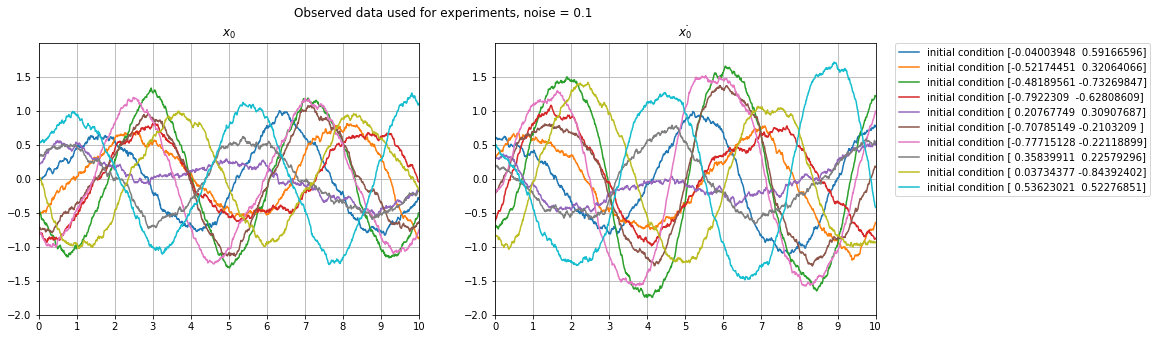

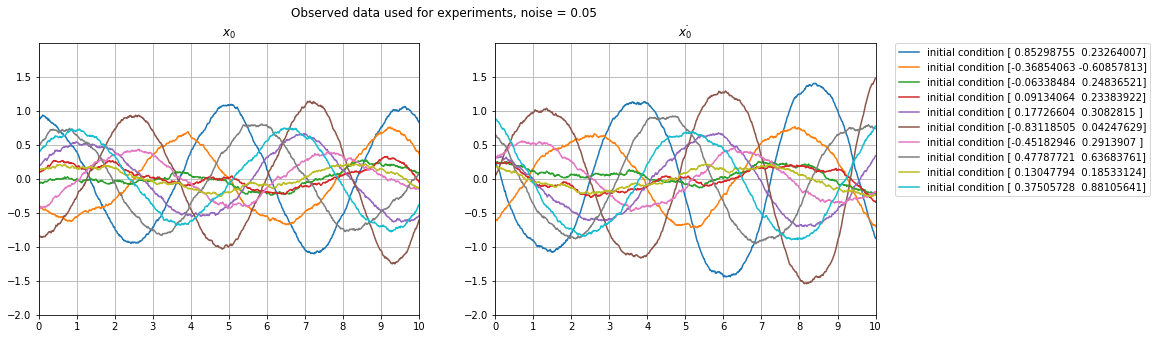

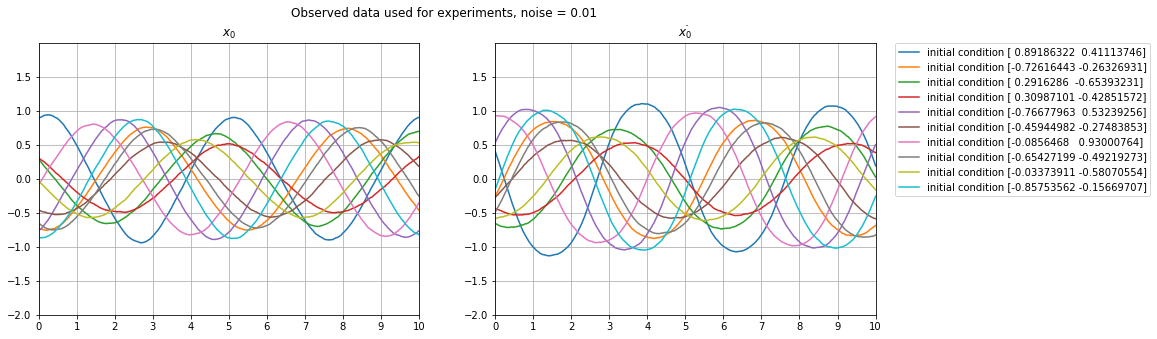

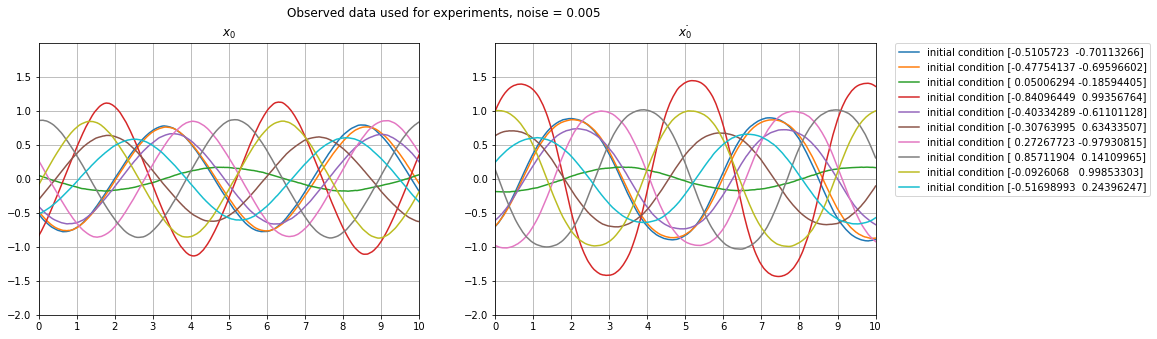

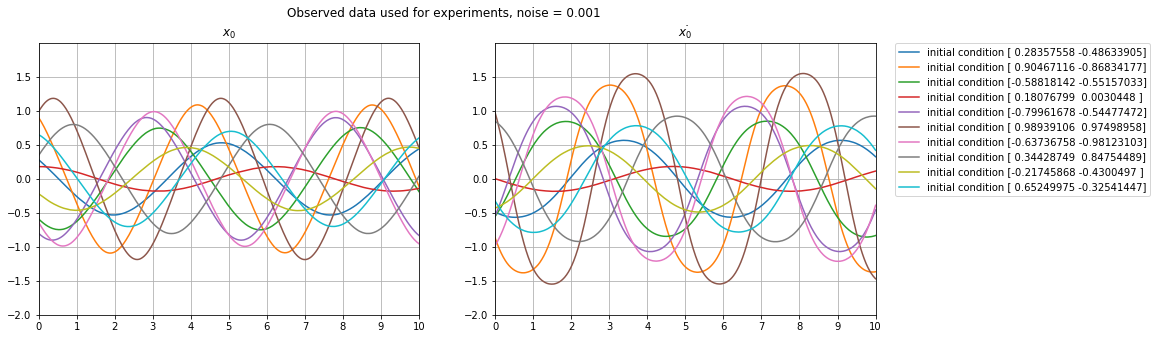

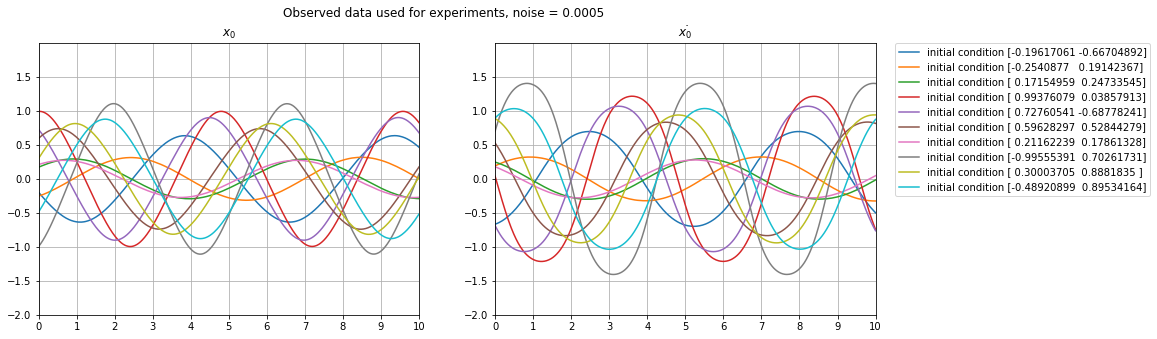

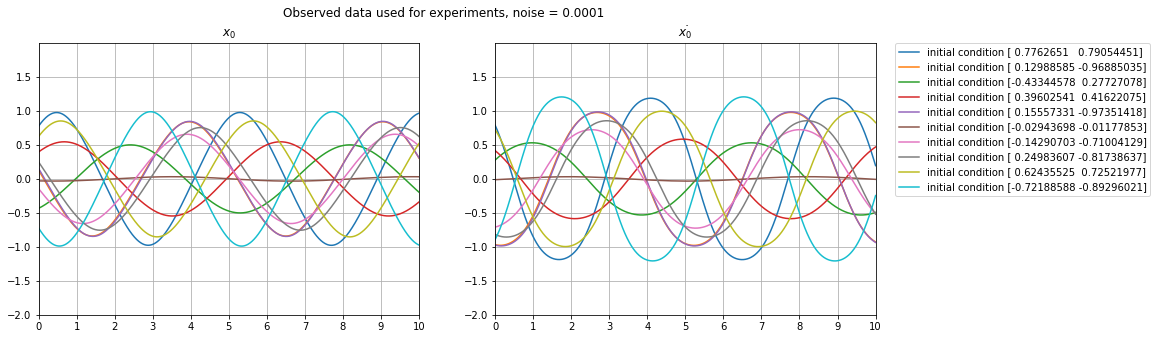

In [2]:
noise_mapping = (0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001)
for parvalue in range(8):
    with open('./data/noise_' + str(parvalue) + '.pkl', 'rb') as f:
       xout, tout, xout_without_noise, euler_param, sim_param = pickle.load(f)

    x = xout[:, 0::10, :]
    t = tout[:, 0::10]

    fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True)
    fig.set_figwidth(15)
    fig.set_figheight(5)
    titles = [r'$x_0$', r'$\dot{x_0}$']

    for i in range(10):
        y_vals = [xout[i, :, 0], xout[i, :, 1]]
        for ax, title, y in zip(axes.flat, titles, y_vals):
            ax.plot(tout[i, :], y, label='initial condition '+str(euler_param.ic[i]))
            ax.set_title(title)
            ax.grid(True)
            ax.set_xticks(np.arange(0, 11, 1))
            ax.set_yticks(np.arange(-2.0, 2.0, 0.5))
            ax.set_xlim([0, 10])
            ax.set_ylim([-2, 2])

    plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
    plt.suptitle('Observed data used for experiments, noise = ' + str(noise_mapping[parvalue]))
    plt.savefig('./data/plots/noise_' + str(parvalue) + '.eps', format = 'eps', bbox_inches='tight')

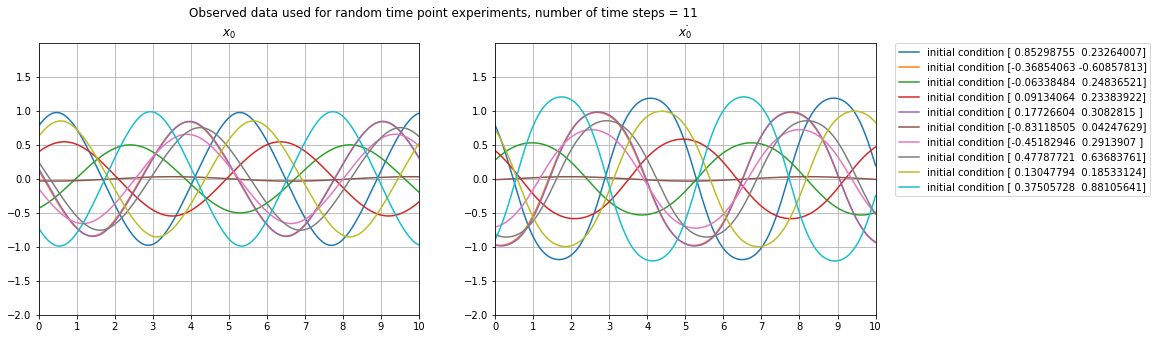

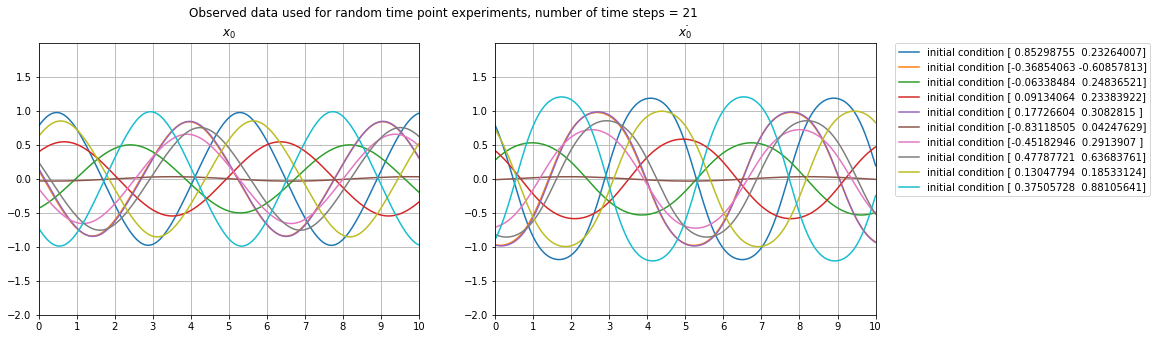

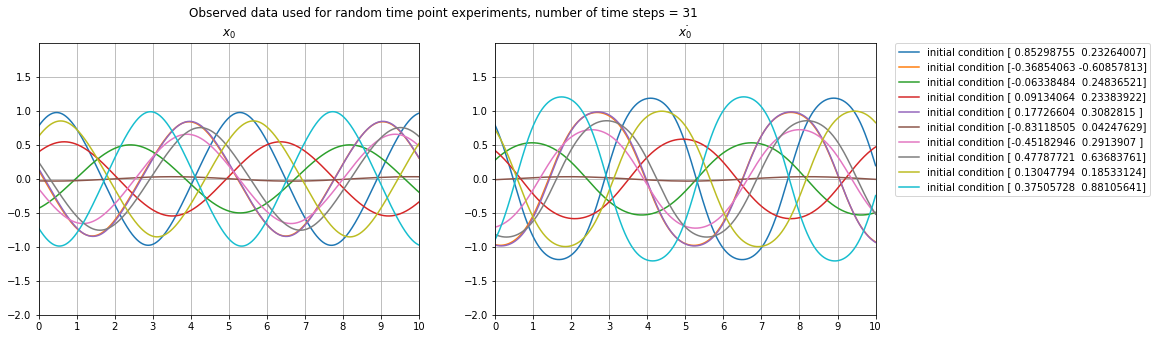

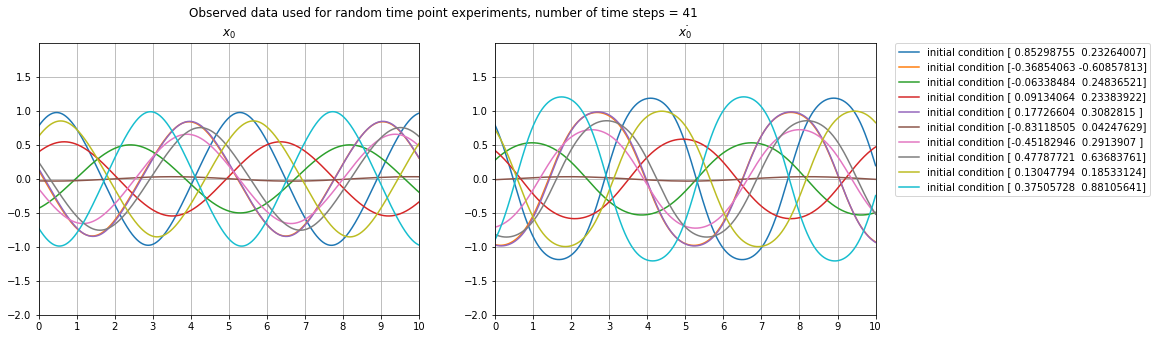

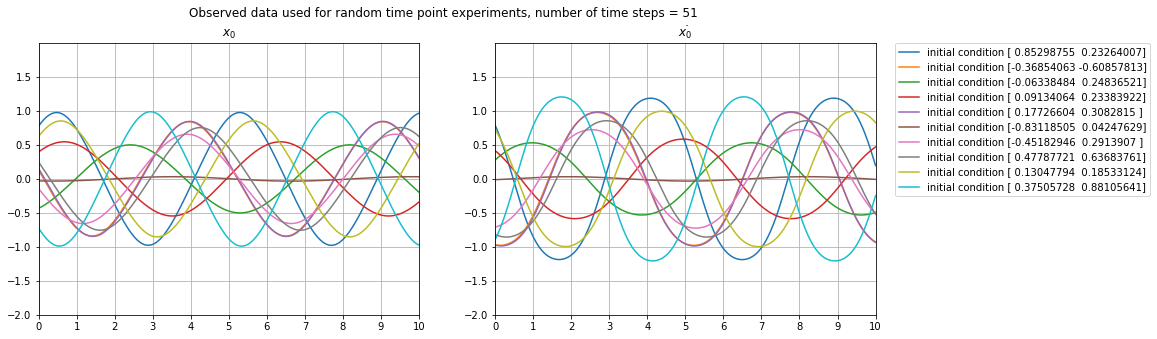

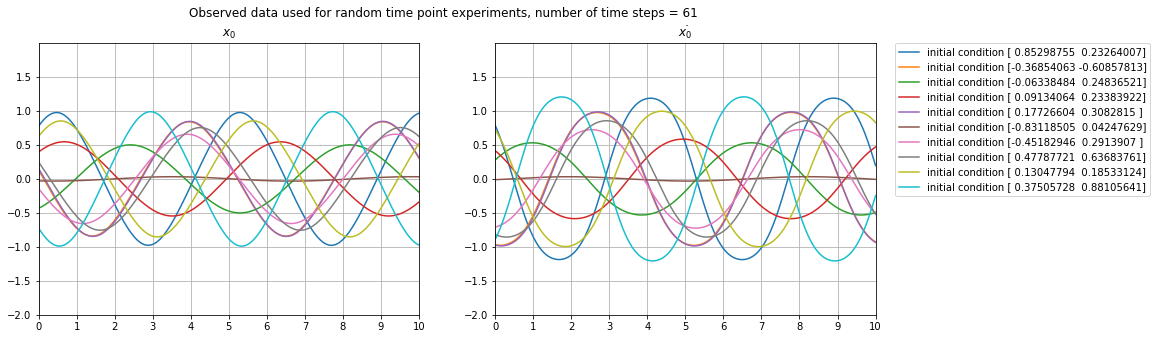

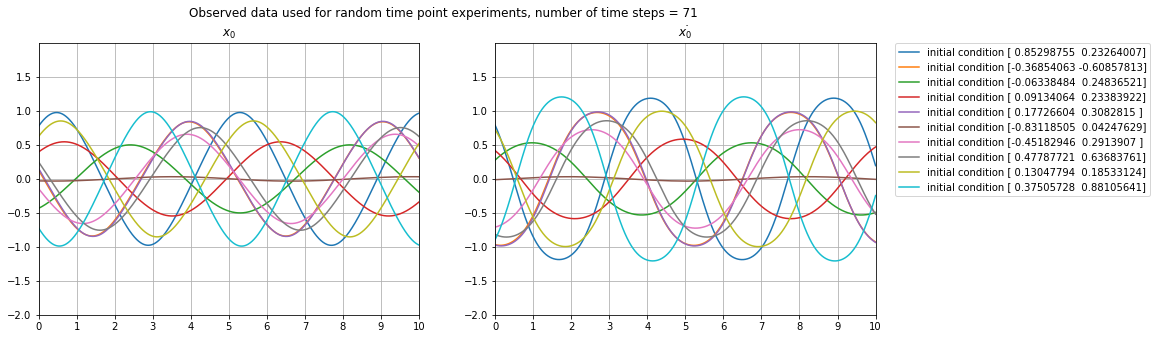

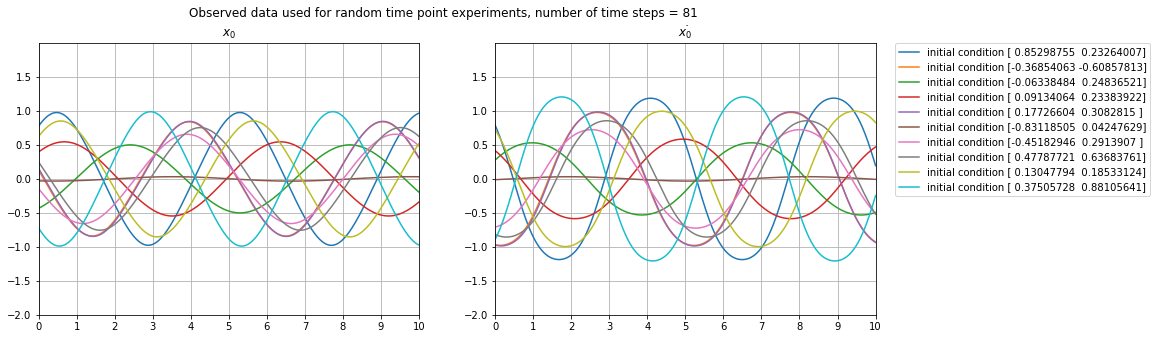

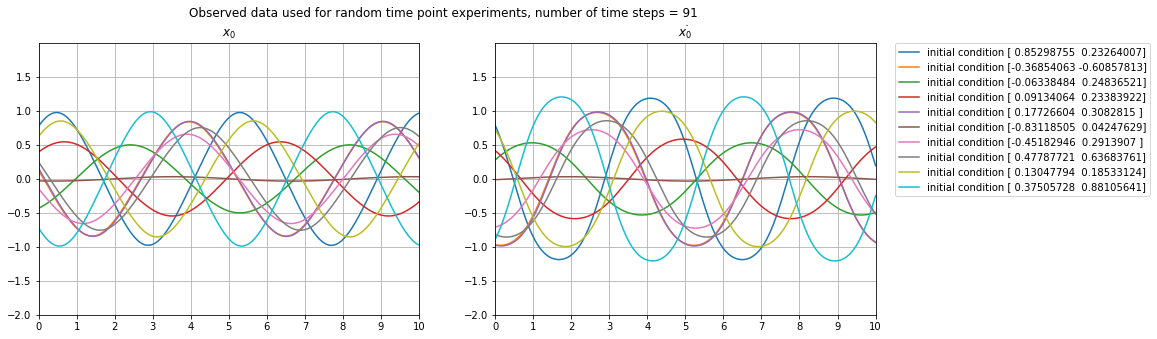

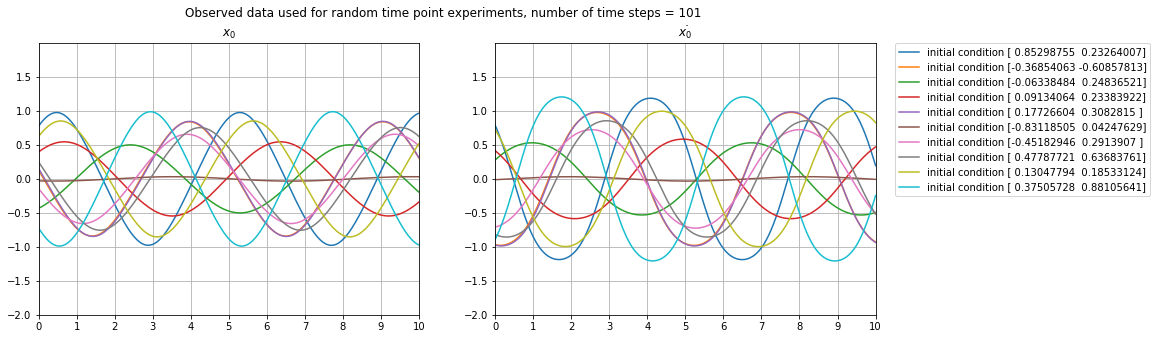

In [3]:
# 1) Data used
for parvalue in range(1, 11):
    with open('./random_timepoints/rand_' + str(parvalue*10+1) + '.pkl', 'rb') as f:
        x, t, error_list, theta_list, estimated_theta, true_theta, inferred_gvec, errors, em_param, data_param, euler_param, sim_param = pickle.load(f)

    fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True)
    fig.set_figwidth(15)
    fig.set_figheight(5)
    titles = [r'$x_0$', r'$\dot{x_0}$']

    for i in range(10):
        y_vals = [xout[i, :, 0], xout[i, :, 1]]
        for ax, title, y in zip(axes.flat, titles, y_vals):
            ax.plot(tout[i, :], y, label='initial condition '+str(euler_param.ic[i]))
            ax.set_title(title)
            ax.grid(True)
            ax.set_xticks(np.arange(0, 11, 1))
            ax.set_yticks(np.arange(-2.0, 2.0, 0.5))
            ax.set_xlim([0, 10])
            ax.set_ylim([-2, 2])

    plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
    plt.suptitle('Observed data used for random time point experiments, number of time steps = ' + str(parvalue*10+1))
    plt.savefig('./random_timepoints/plots/data/rand_' + str(parvalue*10+1) + '.eps', format = 'eps', bbox_inches='tight')

In [9]:
# 2) Error plots
meta_error_list = []
for i in range(1, 11):
    with open('./random_timepoints/rand_' + str(i*10+1) + '.pkl','rb') as f:
        x, t, error_list, theta_list, estimated_theta, true_theta, inferred_gvec, errors, em_param, data_param, euler_param, sim_param = pickle.load(f)
    meta_error_list.append((x.shape, error_list, theta_list, estimated_theta, true_theta, inferred_gvec, errors, em_param, data_param, euler_param, sim_param))

print(meta_error_list[0][6][4])
parval = meta_error_list[0][0][0]
print(parval)

error_plot = np.zeros((2, parval))
g_error = np.zeros((2, parval))
numpoints = np.zeros(parval)

for i in range(parval):
    numpoints[i] = meta_error_list[i][0][1]
    error_plot[0, i] = meta_error_list[i][6][0]
    error_plot[1, i] = meta_error_list[i][6][1]
    g_error[:, i] = np.abs(meta_error_list[i][6][4])

# 2a) Error in estimated theta in Hermite space
fig = plt.figure()
ax = fig.gca()
plt.plot(numpoints, error_plot[0, ])
plt.title('Error in estimated theta in Hermite space')
plt.grid()
plt.savefig('./random_timepoints/plots/error/hermite.eps', format = 'eps', bbox_inches='tight')

# 2b) Error in estimated theta in Ordinary space
fig = plt.figure()
ax = fig.gca()
plt.plot(numpoints, error_plot[1, ])
plt.title('Error in estimated theta in Ordinary space')
plt.grid()
plt.savefig('./random_timepoints/plots/error/ordinary.eps', format = 'eps', bbox_inches='tight')

# 2c) Error in estimated gvec, dim=0
fig = plt.figure()
ax = fig.gca()
plt.plot(numpoints, g_error[0, ])
plt.title('Error in estimated gvec')
plt.grid()
plt.savefig('./random_timepoints/plots/error/gvec0.eps', format = 'eps', bbox_inches='tight')

# 2d) Error in estimated gvec, dim=1
fig = plt.figure()
ax = fig.gca()
plt.plot(numpoints, g_error[1, ])
plt.title('Error in estimated gvec')
plt.grid()
plt.savefig('./random_timepoints/plots/error/gvec1.eps', format = 'eps', bbox_inches='tight')

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True)
fig.set_figwidth(15)
fig.set_figheight(5)
titles = [r'$x_0$', r'$\dot{x_0}$']

y_vals = [g_error[0, :], g_error[1, :]]
for ax, title, y1 in zip(axes.flat, titles, y_vals):
    ax.plot(numpoints, y_vals)
    ax.set_title(title)
    ax.grid(True)

plt.suptitle('Error in estimated gvec')
plt.savefig('./random_timepoints/plots/error/gvec.eps', format = 'eps', bbox_inches='tight')

FileNotFoundError: [Errno 2] No such file or directory: './random_timepoints/rand_71.pkl'

IndexError: list index out of range

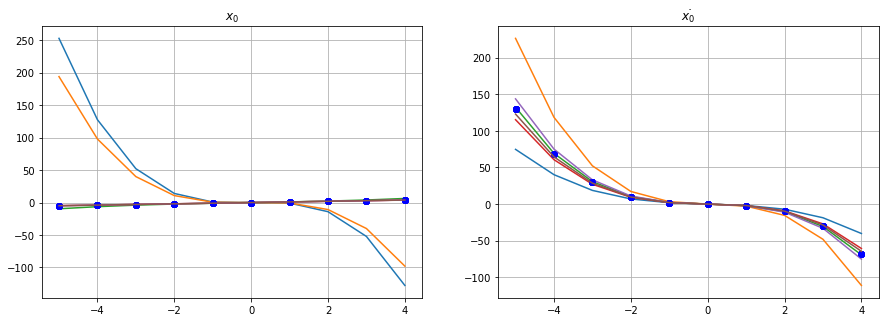

In [12]:
# 3) Comparison of true drift function vs estimated drift function
def f(theta, x):
    y = np.zeros((x.shape[0], x.shape[1]))
    for i in range(x.shape[0]):
        y[i, :] = theta[0, i] + theta[1, i]*x[0, :] + theta[2, i]*x[1, :] + theta[3, i]*(x[0, :]**2) + theta[4, i]*(x[0, :]*x[1, :]) + theta[5, i]*(x[1, :]**2) + theta[6, i]*(x[0, :]**3) + theta[7, i]*(x[0, :]**2 * x[1, :]) + theta[8, i]*(x[0, :] * x[1, :]**2) + theta[9, i]*(x[1, :]**3)
    return (y)

x1 = np.array((np.arange(-5.0, 5.0, 1), np.arange(-5.0, 5.0, 1)))
x2 = np.array((np.arange(-5.0, 5.0, 1), np.arange(-5.0, 5.0, 1)))

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True)
fig.set_figwidth(15)
fig.set_figheight(5)
titles = [r'$x_0$', r'$\dot{x_0}$']

for i in range(parval):
    y_vals_2 = [f(np.array(meta_error_list[i][3].ordinary), x2)[0, :], f(np.array(meta_error_list[i][3].ordinary), x2)[1, :]]
    y_vals_1 = [f(np.array(meta_error_list[0][4].ordinary), x1)[0, :], f(np.array(meta_error_list[0][4].ordinary), x1)[1, :]]
    for ax, title, y1, y2 in zip(axes.flat, titles, y_vals_1, y_vals_2):
        ax.plot(x1[0, :], y1, 'bo', label='true drift')
        ax.plot(x2[0, :], y2, label='time points = '+str(meta_error_list[i][0][1]))
        ax.set_title(title)
        ax.grid(True)

plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.suptitle('Comparison of true drift function vs estimated drift functions')
plt.savefig('./random_timepoints/plots/error/drift_comparison.eps', format = 'eps', bbox_inches='tight')